### Cardiovascular Disease data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# cardio data
path = 'E:/RESEARCH/Datasets/cardio/cardio.csv'
cardio =  pd.read_csv(path, delimiter=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
cardio = cardio.iloc[0:1500, :]

In [36]:
cardio.shape

(1500, 13)

In [37]:
cardio['null1'] = 0
cardio['null2'] = 0
cardio['null3'] = 0
cardio['null4'] = 0
cardio['null5'] = 0

In [38]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,null1,null2,null3,null4,null5
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,0,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0,0


In [39]:
#remove sub, outcome. 
cardio16 = cardio.drop(['id','cardio'], axis=1)
cardio16.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,null1,null2,null3,null4,null5
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,0,0,0,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,0,0,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,0,0,0,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0


In [40]:
# 우리가 만들 분석모델의 target인 y는 disorder
y = cardio.loc[:,['cardio']]
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [41]:
# 환자만 따로 뽑으면
patient = cardio.loc[:, ['id']]
patient.head

<bound method NDFrame.head of         id
0        0
1        1
2        2
3        3
4        4
...    ...
1495  2113
1496  2114
1497  2115
1498  2116
1499  2117

[1500 rows x 1 columns]>

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cardio16[:] = scaler.fit_transform(cardio16[:])

In [43]:
cardio16.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,null1,null2,null3,null4,null5
0,0.436818,1.0,0.754098,0.132075,0.473684,0.046729,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.632991,0.0,0.655738,0.276730,0.617225,0.056075,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.486423,0.0,0.729508,0.144654,0.569378,0.037383,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.354501,1.0,0.762295,0.257862,0.665072,0.065421,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.338572,0.0,0.655738,0.094340,0.425837,0.028037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
cardio16.shape

(1500, 16)

In [45]:
# Checking values
x0 = cardio16.loc[450].values

In [46]:
x0

array([0.61471028, 0.        , 0.70491803, 0.18238994, 0.5215311 ,
       0.04672897, 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [47]:
# 3 x 3으로 reshape
x0 = x0.reshape(4,4)

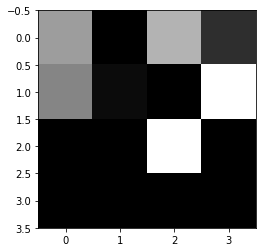

In [48]:
#gray scale로 확인해보고
plt.imshow(x0, cmap='gray')

In [49]:
# Finish checking, for our dataset
cardio16.loc[0] 

age            0.436818
gender         1.000000
height         0.754098
weight         0.132075
ap_hi          0.473684
ap_lo          0.046729
cholesterol    0.000000
gluc           0.000000
smoke          0.000000
alco           0.000000
active         1.000000
null1          0.000000
null2          0.000000
null3          0.000000
null4          0.000000
null5          0.000000
Name: 0, dtype: float64

In [50]:
cardio16_arr = cardio16.values
cardio16_arr.shape

(1500, 16)

In [51]:
# 768 x 3 x 3 reshape
cardio_array = cardio16_arr.reshape(1500,4,4)

In [52]:
cardio_array.shape

(1500, 4, 4)

#### saving data(numpy)

In [53]:
np.save('E:/RESEARCH/Datasets/cardio/y.npy', y)

In [54]:
np.save('E:/RESEARCH/Datasets/cardio/x.npy', cardio_array)

In [55]:
np.save('E:/RESEARCH/Datasets/cardio/patient.npy', patient)

In [29]:
xdata = np.load('E:/RESEARCH/Datasets/cardio/x.npy')

In [30]:
xdata

array([[[0.58747655, 1.        , 0.54444444, 0.18823529],
        [0.01810345, 0.008     , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.73092558, 0.        , 0.47777778, 0.32352941],
        [0.02068966, 0.009     , 1.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.62374922, 0.        , 0.52777778, 0.2       ],
        [0.01982759, 0.007     , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       ...,

       [[0.2960444 , 0.        , 0.48888889, 0.21176471],
        [0.01982759, 0.009     , 0.5       , 0.5       ],
        [0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.58239525, 0.        , 0.54444444, 0.2352